### Leitura dos dados e primeiras análises

In [1]:
import pandas as pd

df = pd.read_csv('monitoramento_tempo.csv')
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


### Convertendo a variável data para datetime

In [3]:
df.data = pd.to_datetime(df.data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temperatura          45253 non-null  float64       
 1   pressão              45253 non-null  float64       
 2   humidade             45253 non-null  float64       
 3   direção do vento     45253 non-null  float64       
 4   velocidade do vento  45253 non-null  float64       
 5   dia_da_semana        45253 non-null  object        
 6   data                 45253 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.4+ MB


### Primeiras visualizações

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

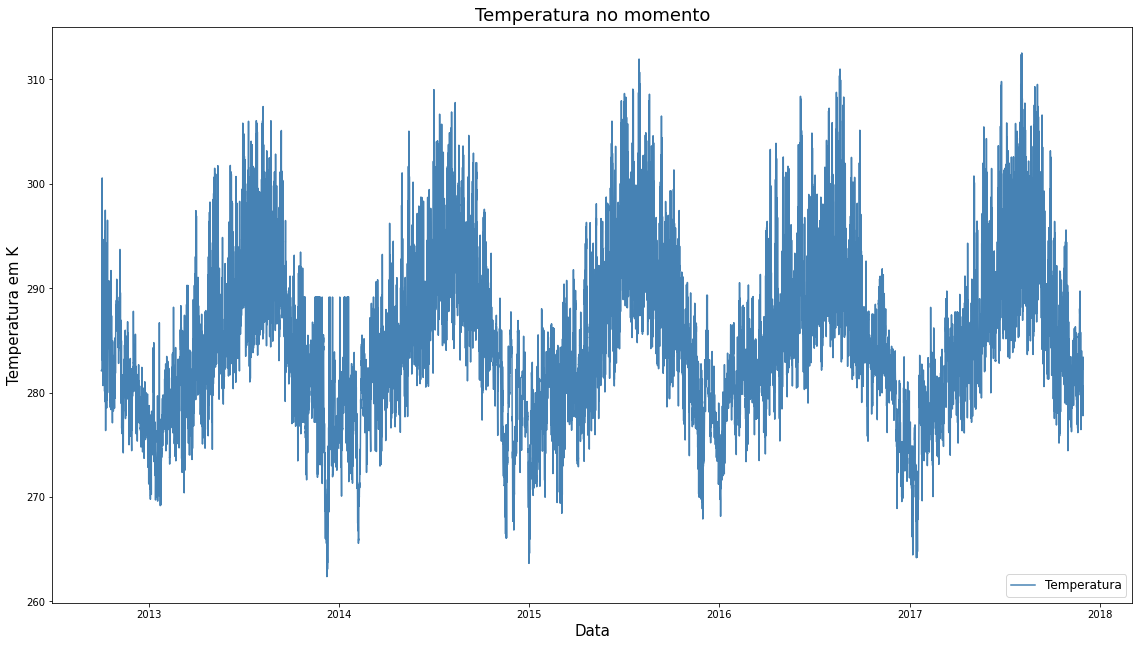

In [5]:
# Variação da temperatura em gráfico de linha
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(df.data, df.temperatura, color = 'steelblue')

ax.set_title('Temperatura no momento', fontsize = 18)
ax.set_ylabel('Temperatura em K', fontsize = 15)
ax.set_xlabel('Data', fontsize = 15)
ax.legend(['Temperatura'], loc = 'lower right', fontsize = 12)

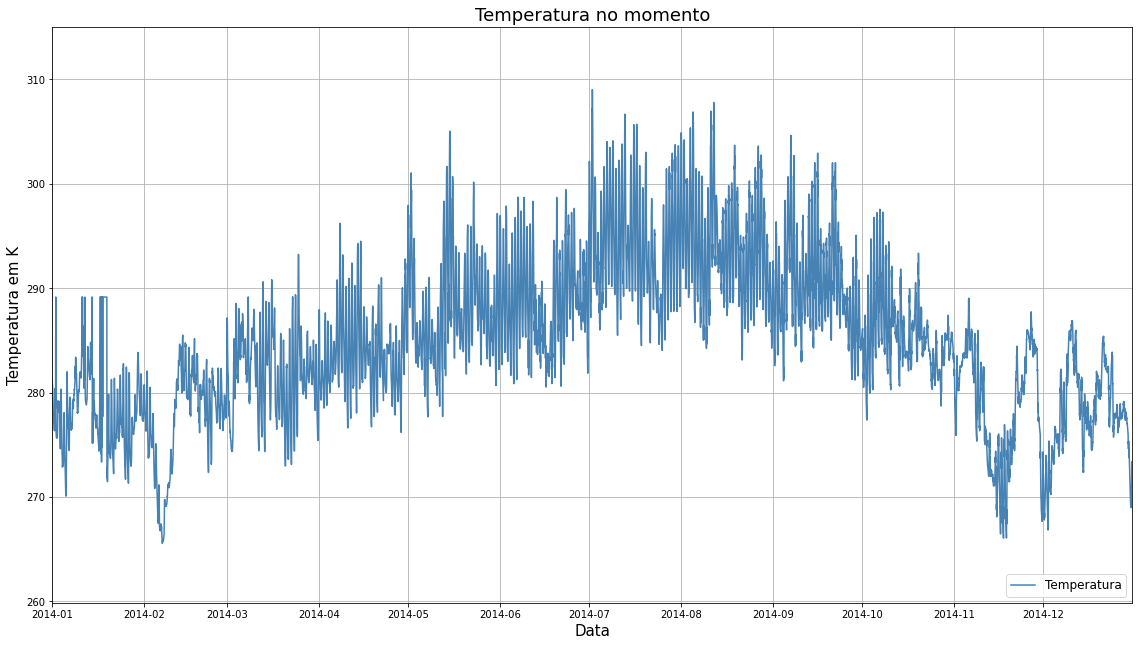

In [6]:
#separando a visualização de um período específico com linhas de grade
import datetime

fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(df.data, df.temperatura, color = 'steelblue')

ax.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2014,12,31))
ax.set_title('Temperatura no momento', fontsize = 18)
ax.set_ylabel('Temperatura em K', fontsize = 15)
ax.set_xlabel('Data', fontsize = 15)
ax.legend(['Temperatura'], loc = 'lower right', fontsize = 12)
ax.grid(True)

### Visualizando o foco e a série inteira ao mesmo tempo

Text(0.5, 1.0, 'Temperatura no momento')

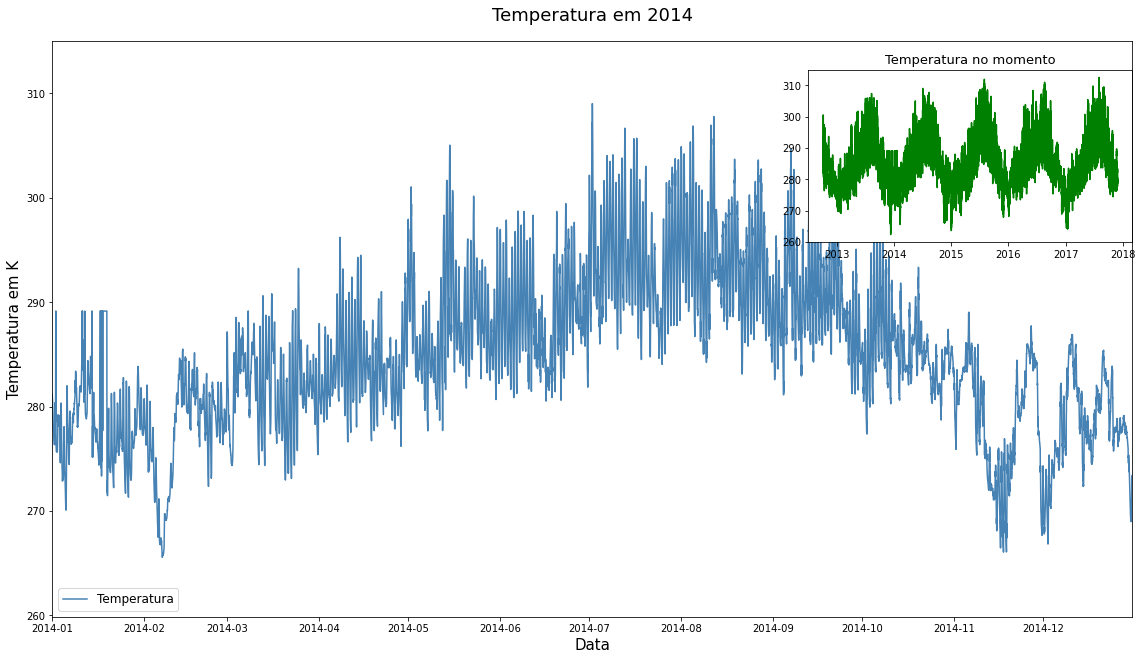

In [7]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.7, 0.65, 0.3, 0.3])

ax.plot(df.data, df.temperatura, color = 'steelblue')
ax.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2014,12,31))
ax.set_title('Temperatura em 2014', fontsize = 18, pad=20)
ax.set_ylabel('Temperatura em K', fontsize = 15)
ax.set_xlabel('Data', fontsize = 15)
ax.legend(['Temperatura'], loc='lower left', fontsize = 12)

ax2.plot(df.data, df.temperatura, color = 'green')
ax2.set_title('Temperatura no momento', fontsize = 13)

### Focando no mês de maio de 2014

Text(0.5, 1.0, 'Temperatura em 2014')

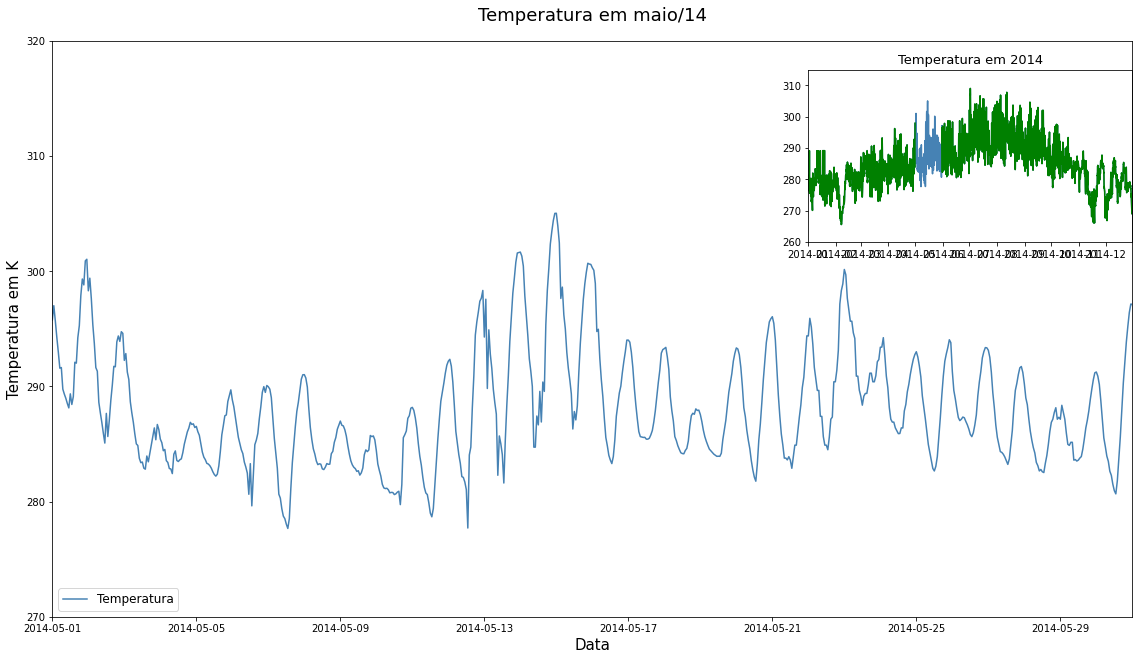

In [8]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.7, 0.65, 0.3, 0.3])

ax.plot(df.data, df.temperatura, color = 'steelblue')
ax.set_xlim(datetime.datetime(2014,5,1), datetime.datetime(2014,5,31))
ax.set_ylim(270, 320)
ax.set_title('Temperatura em maio/14', fontsize = 18, pad=20)
ax.set_ylabel('Temperatura em K', fontsize = 15)
ax.set_xlabel('Data', fontsize = 15)
ax.legend(['Temperatura'], loc='lower left', fontsize = 12)

azul_esquerda = df.data < datetime.datetime(2014,5,1)
azul_direita = df.data > datetime.datetime(2014,5,31)

ax2.plot(df.data, df.temperatura, color = 'steelblue')
ax2.plot(df[azul_esquerda].data, df[azul_esquerda].temperatura, color = 'g')
ax2.plot(df[azul_direita].data, df[azul_direita].temperatura, color = 'g')
ax2.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2014,12,31))
ax2.set_title('Temperatura em 2014', fontsize = 13)

### Gráfico com linhas de temperatura máxima e mínima

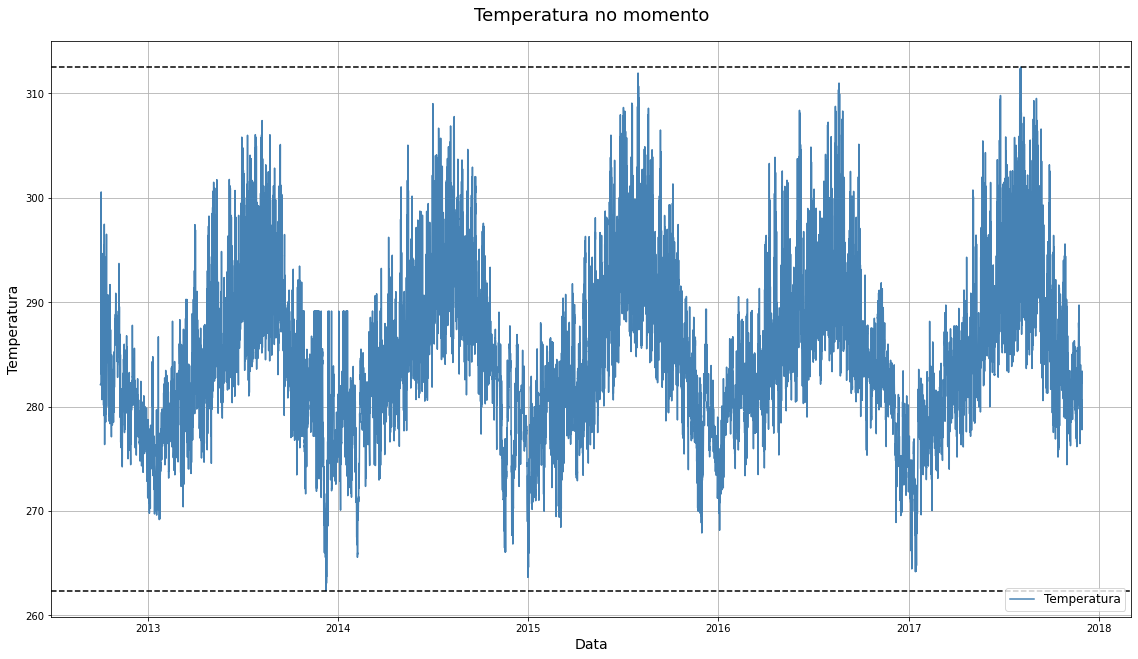

In [9]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_axes([0,0,1,1])

ax.plot(df.data, df.temperatura, color ='steelblue')
ax.set_title('Temperatura no momento', fontsize = 18, pad = 20)
ax.set_xlabel('Data', fontsize = 14)
ax.set_ylabel('Temperatura', fontsize = 14)
ax.legend(['Temperatura'], loc = 'lower right', fontsize = 12)
ax.grid(True)

ax.axhline(max(df.temperatura), color = 'k', linestyle = '--')
ax.axhline(min(df.temperatura), color = 'k', linestyle = '--')

### Visualizando temperatura por dias da semana

In [10]:
temperatura_dia_semana = df.groupby('dia_da_semana')['temperatura'].mean()
temperatura_dia_semana

dia_da_semana
Domingo    285.009095
Quarta     284.998290
Quinta     285.000643
Segunda    284.985382
Sexta      285.060886
Sábado     285.003316
Terça      284.892811
Name: temperatura, dtype: float64

In [12]:
#ordenando os dias
ordenado = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
temperatura_dia_semana = temperatura_dia_semana[ordenado]
temperatura_dia_semana

dia_da_semana
Domingo    285.009095
Segunda    284.985382
Terça      284.892811
Quarta     284.998290
Quinta     285.000643
Sexta      285.060886
Sábado     285.003316
Name: temperatura, dtype: float64

<Axes:title={'center':'Temperatura por dia da semana'}, xlabel='Dia da semana', ylabel='Temperatura média'>

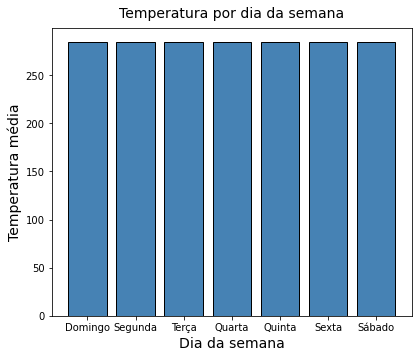

In [22]:
fig = plt.figure(figsize = (5,4))
ax = fig.add_axes([0,0,1,1])

indice = range(len(temperatura_dia_semana))

ax.bar(indice, temperatura_dia_semana, color = 'steelblue', edgecolor = 'k')
ax.set_title('Temperatura por dia da semana', fontsize = 14, pad = 10)
ax.set_xlabel('Dia da semana', fontsize = 14)
ax.set_ylabel('Temperatura média', fontsize = 14)
ax.set_xticks(indice)
ax.set_xticklabels(ordenado)
ax

Text(0.5, 1.0, 'Temperatura por dia da semana')

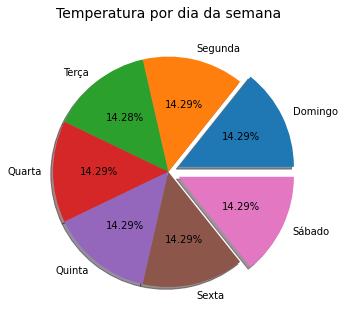

In [28]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0,0,1,1])

separar = [0.1,0,0,0,0,0,0.1]

ax.pie(temperatura_dia_semana, labels = temperatura_dia_semana.index, autopct='%.2f%%', explode = separar, shadow = True)
ax.set_title('Temperatura por dia da semana', fontsize = 14, pad = 10)